# Градиентный бустинг


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students.csv', delimiter=',')

In [ ]:
df_cut=df[['Growth','Weight','Sex','Hair length','Children number']]
df_cut=df_cut.dropna()

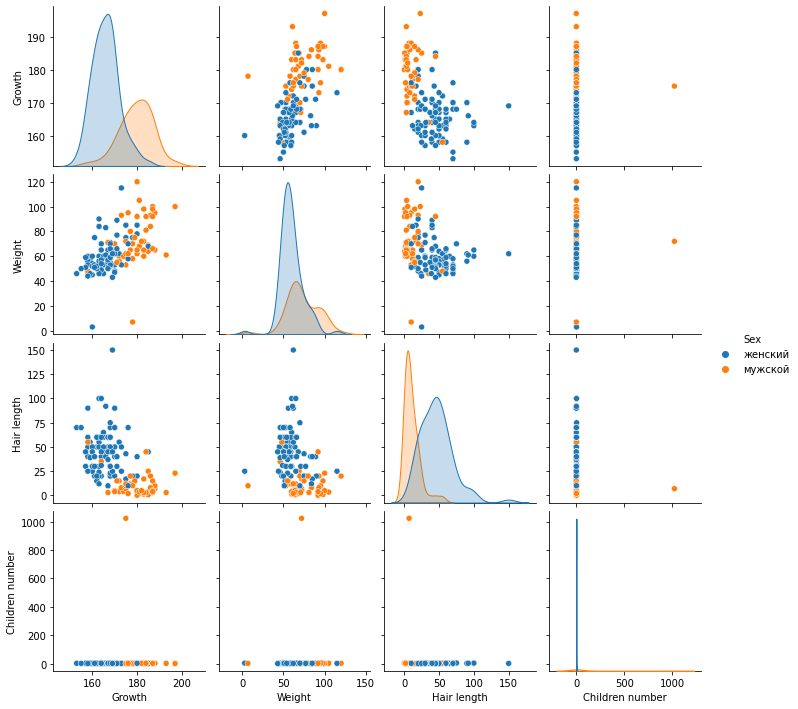

In [ ]:
sns.pairplot(df_cut, hue='Sex')

In [ ]:
model=GradientBoostingClassifier(random_state=0)
model.fit(df_cut[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4), y=df_cut['Sex'].values)

GradientBoostingClassifier(random_state=0)

Загружаем тестовую выбоку

In [ ]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_test.csv', delimiter=',')
df_test_cut=df_test[['Growth','Weight','Sex','Hair length','Children number']]
df_test_cut=df_test_cut.dropna()

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [ ]:
df_test_cut['Predicted']=model.predict(df_test_cut[['Growth','Weight','Hair length','Children number']].values.reshape(-1,4))

Метрики качества задачи классификации

In [ ]:
pd.crosstab(df_test_cut['Predicted'],df_test_cut['Sex'])

Sex        женский  мужской
Predicted                  
женский         42        1
мужской          0       25

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(df_test_cut['Sex'], df_test_cut['Predicted'])

(array([0.97674419, 1.        ]),
 array([1.        , 0.96153846]),
 array([0.98823529, 0.98039216]),
 array([42, 26]))

In [4]:
model = GradientBoostingClassifier(random_state=0)
model.fit(df.iloc[:,6:17].values.reshape(-1,11), y=df['Your insitute'].values)

GradientBoostingClassifier(random_state=0)

Загружаем тестовую выбоку

In [5]:
df_test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students_test.csv', delimiter=',')

In [ ]:
df_test.info()

Внимание: через функцию predict прогоняем объекты **тестовой** выборки

In [6]:
df_test['Predicted']=model.predict(df_test.iloc[:,6:17].values.reshape(-1,11))

Метрики качества задачи классификации

In [7]:
pd.crosstab(df_test['Predicted'],df_test['Your insitute'])

Your insitute                                 Другое  \
Predicted                                              
Другое                                             1   
Естественный (биология-химия-физика-технари)       3   
Математический и ИТ                                1   
Педагогический                                     1   
СоцГум                                             0   
Экономический                                      1   
Юридический                                        0   

Your insitute                                 Естественный (биология-химия-физика-технари)  \
Predicted                                                                                    
Другое                                                                                   3   
Естественный (биология-химия-физика-технари)                                            10   
Математический и ИТ                                                                      7   
Педагогический                                                                           3   
СоцГум                                                                                   0   
Экономический                                                                            0   
Юридический                                                                              0   

Your insitute                                 Математический и ИТ  \
Predicted                                                           
Другое                                                          0   
Естественный (биология-химия-физика-технари)                    0   
Математический и ИТ                                            30   
Педагогический                                                  2   
СоцГум                                                          2   
Экономический                                                   2   
Юридический                                                     0   

Your insitute                                 Педагогический  СоцГум  \
Predicted                                                              
Другое                                                     2       1   
Естественный (биология-химия-физика-технари)               2       0   
Математический и ИТ                                        2       0   
Педагогический                                             1       1   
СоцГум                                                     0       7   
Экономический                                              1       0   
Юридический                                                0       0   

Your insitute                                 Экономический  Юридический  
Predicted                                                                 
Другое                                                    0            0  
Естественный (биология-химия-физика-технари)              0            0  
Математический и ИТ                                       8            0  
Педагогический                                            2            0  
СоцГум                                                    0            0  
Экономический                                             3            1  
Юридический                                               0            1